#### Loading model

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import normalize
import matplotlib.pyplot as plt
import cv2
import numpy as np
from glob import glob
import os
import random

model = load_model('./20221030_atherosclerosis_model.h5')

In [9]:
def segment_image(img_path):
    img = cv2.imread(img_path, 0)
    img = np.array(img)

    img = np.expand_dims(img, axis=2)
    img = normalize(img, axis=1)

    img_norm = img[:,:,0][:,:,None]
    img_input=np.expand_dims(img_norm, 0)
    
    prediction=(model.predict(img_input))
    predicted_img=np.argmax(prediction, axis=3)[0,:,:]

    plt.figure(figsize=(12, 8))
    plt.subplot(231)
    plt.title('Testing image')
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY), cmap='gray')
    plt.subplot(232)
    plt.title('Prediction')
    plt.imshow(predicted_img, cmap='gray')
    plt.show()

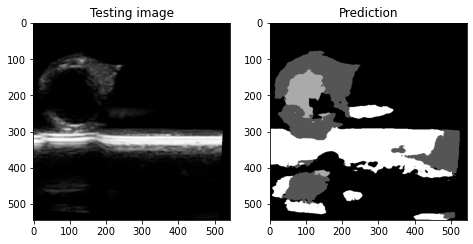

In [12]:
segment_image('../Dataset/Generated_Testing_Images/generated_0_1400.png')